In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

sns.set_style("whitegrid")

In [14]:
df = pd.read_csv("../resources/data/discords/stock/S&P_500_Index_Data.csv",parse_dates=['date'])
df

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97
...,...,...
8187,2018-06-25,2717.07
8188,2018-06-26,2723.06
8189,2018-06-27,2699.63
8190,2018-06-28,2716.31


In [15]:
df =df.set_index(df['date'])
df = df.drop(columns=['date'])
df.head()

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97


In [16]:
df['anomaly'] = 0
df

,close,anomaly
date,,
1986-01-02,209.59,0
1986-01-03,210.88,0
1986-01-06,210.65,0
1986-01-07,213.80,0
1986-01-08,207.97,0
...,...,...
2018-06-25,2717.07,0
2018-06-26,2723.06,0
2018-06-27,2699.63,0


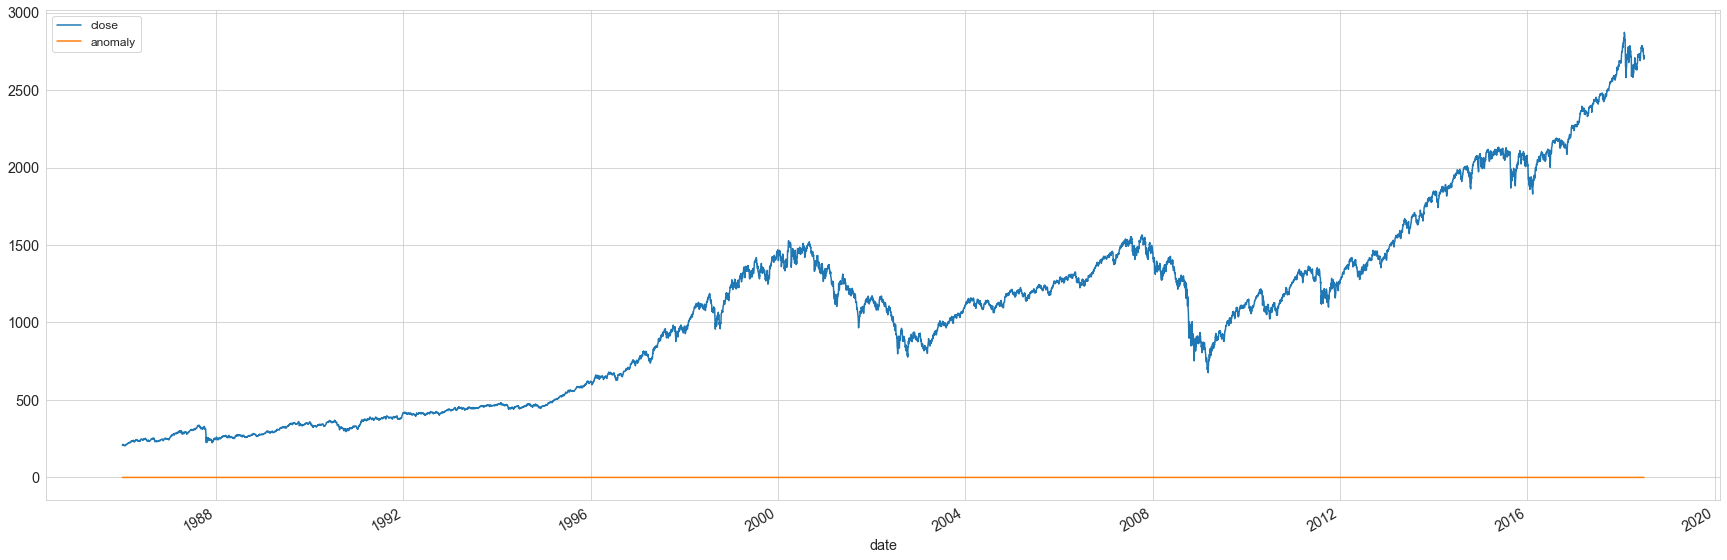

In [17]:
df.plot(figsize=(30,10))
plt.show()

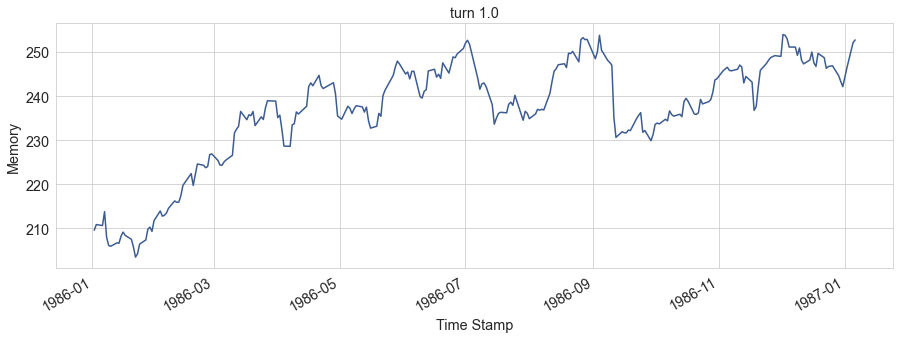

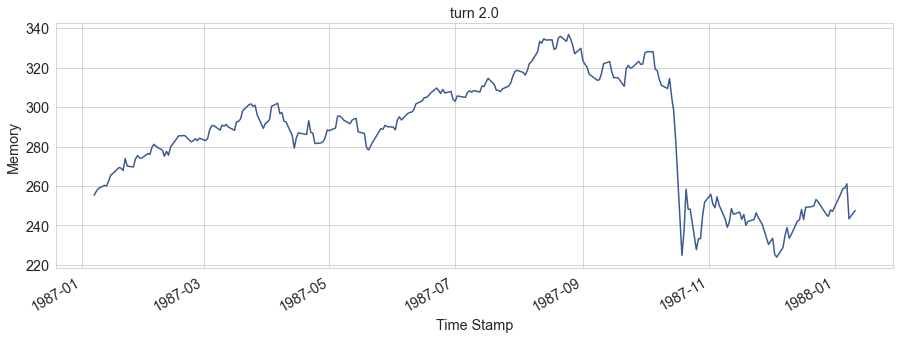

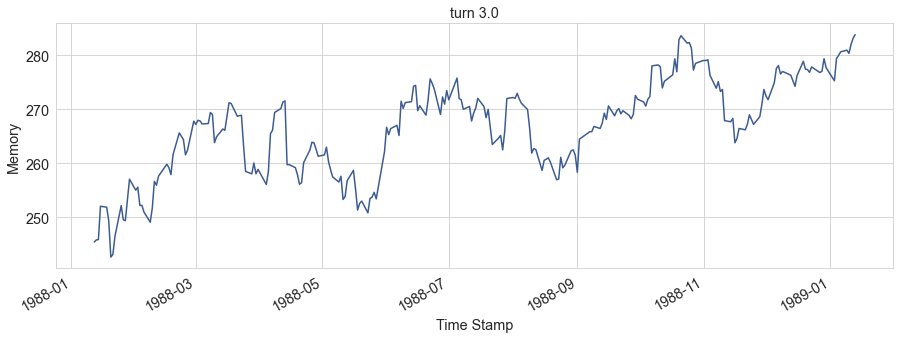

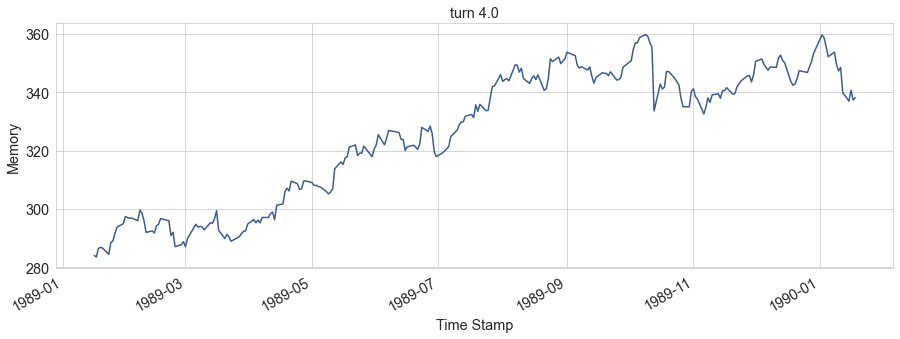

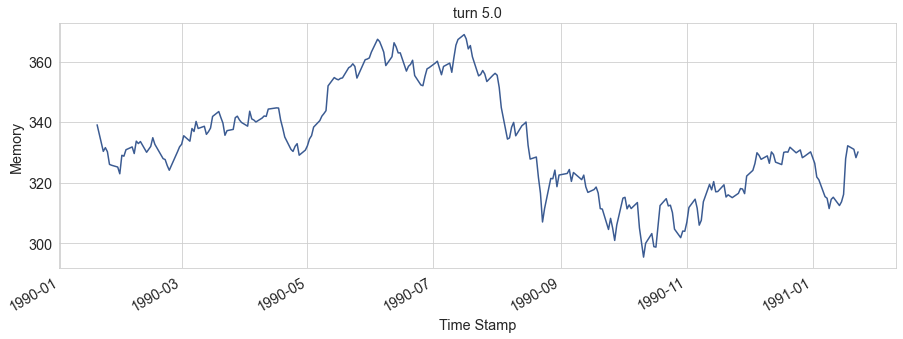

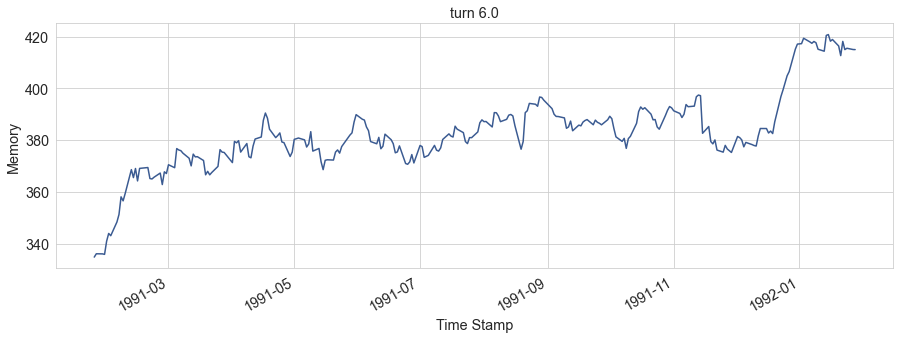

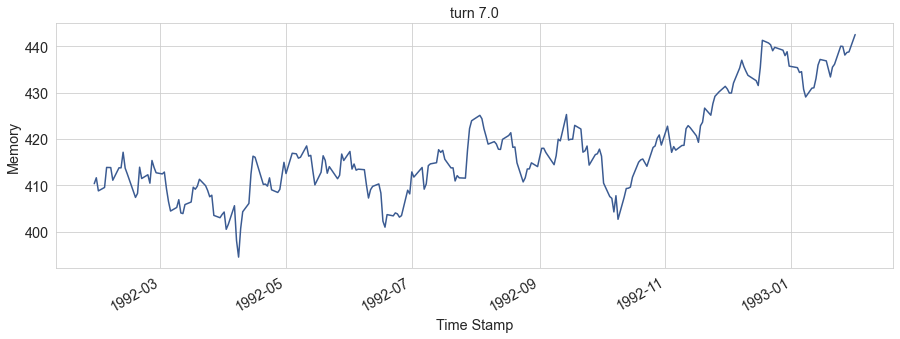

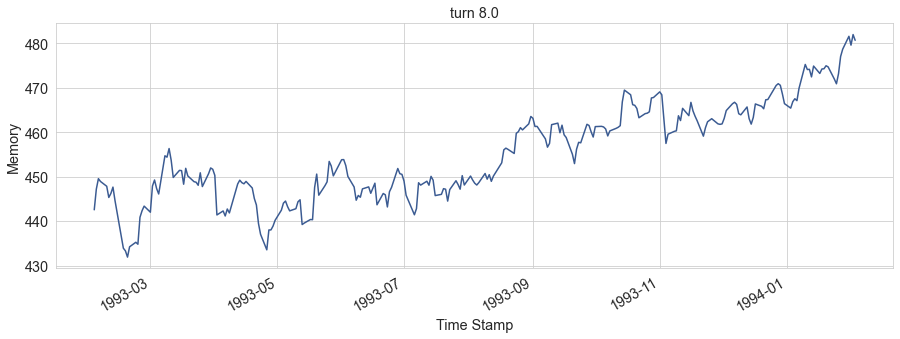

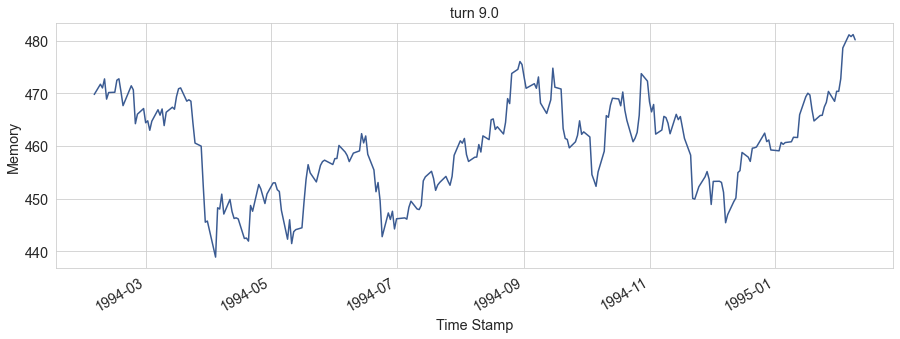

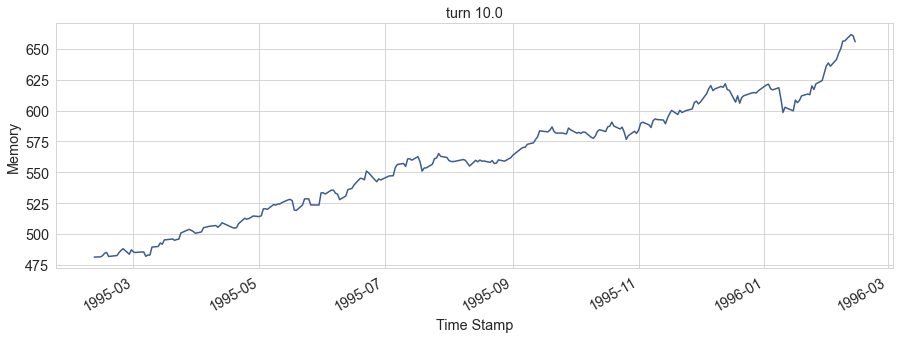

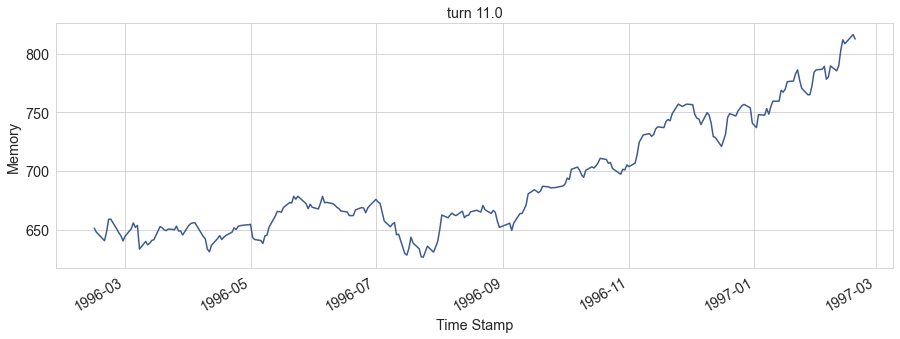

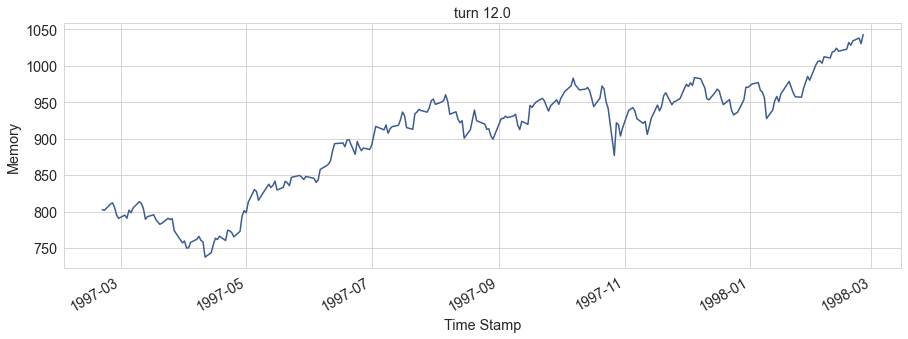

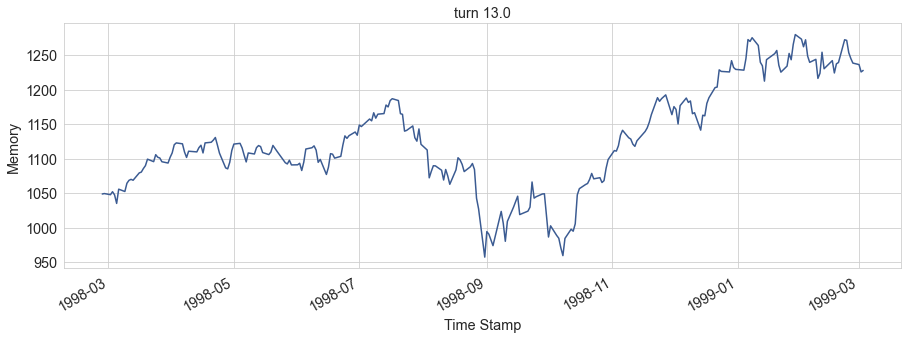

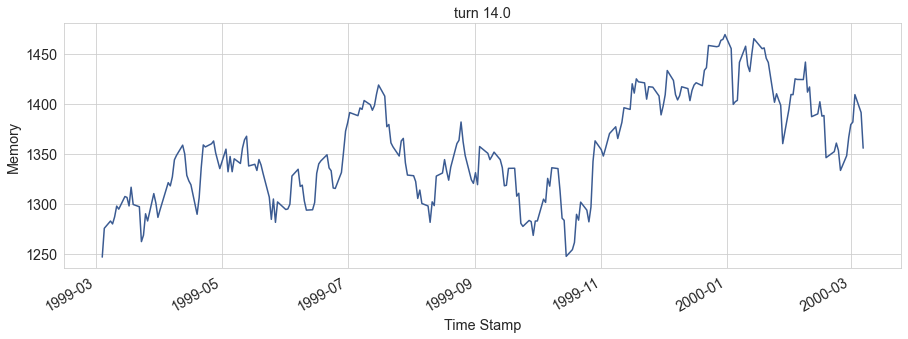

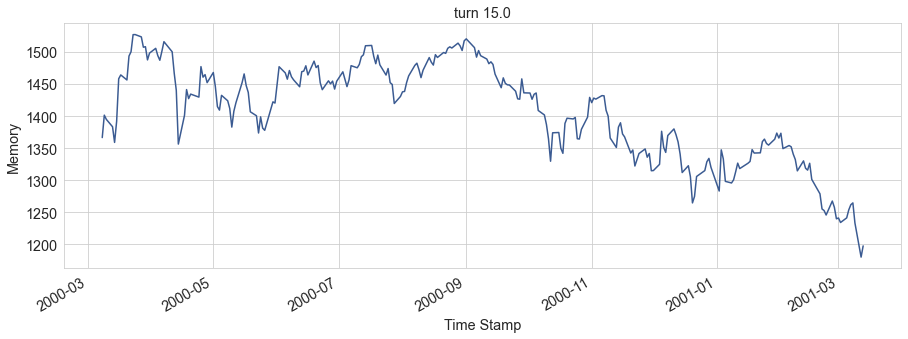

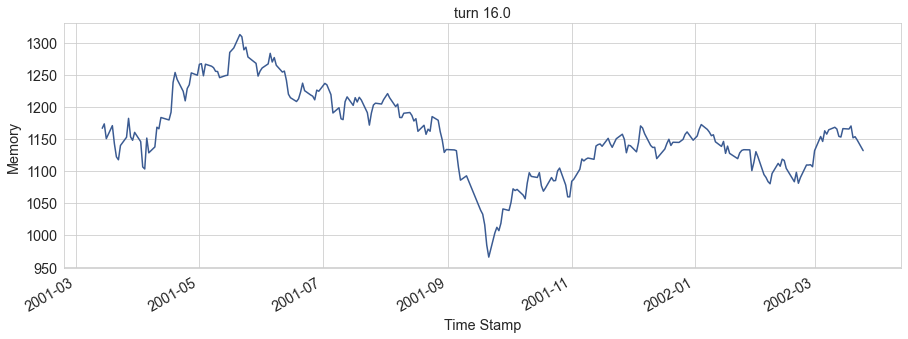

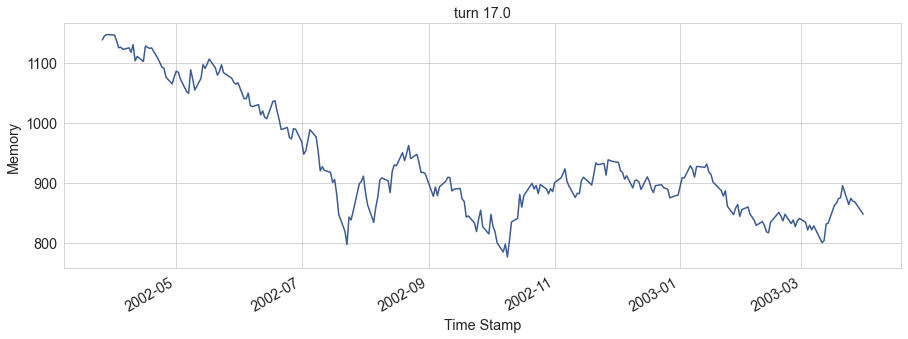

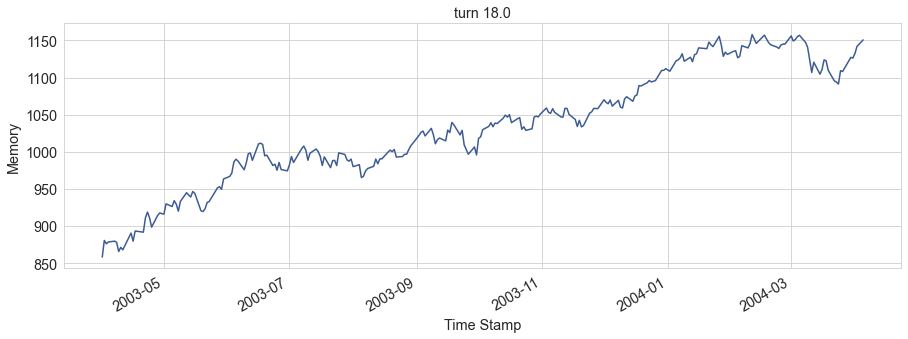

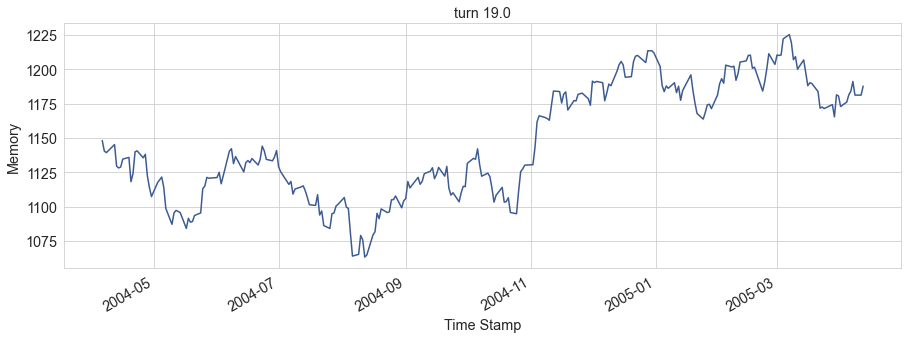

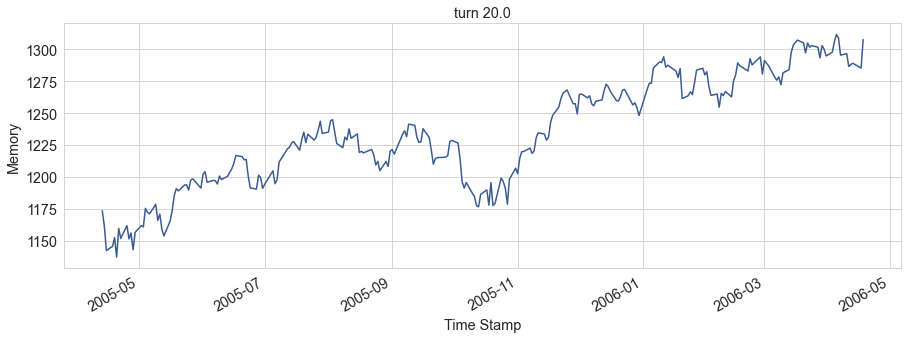

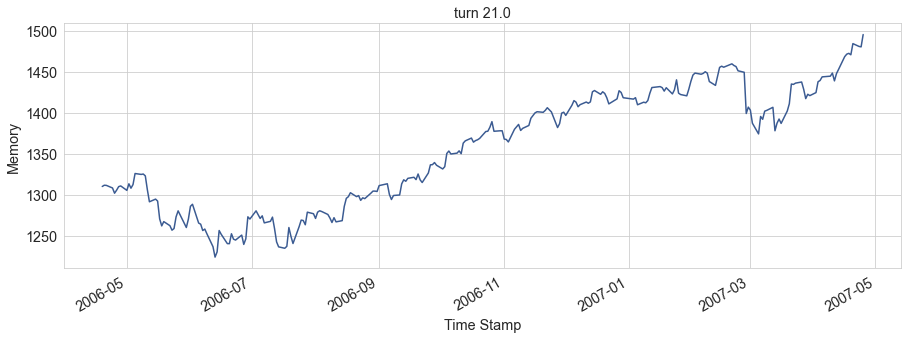

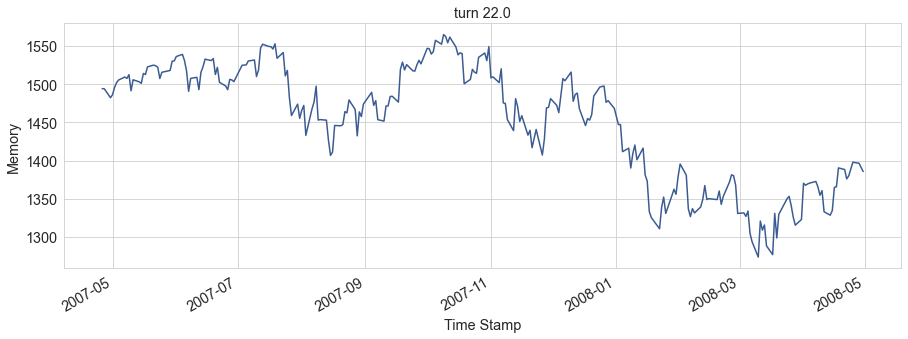

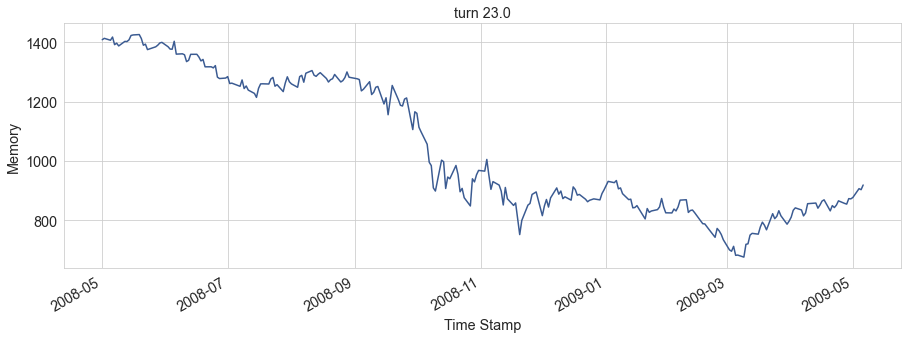

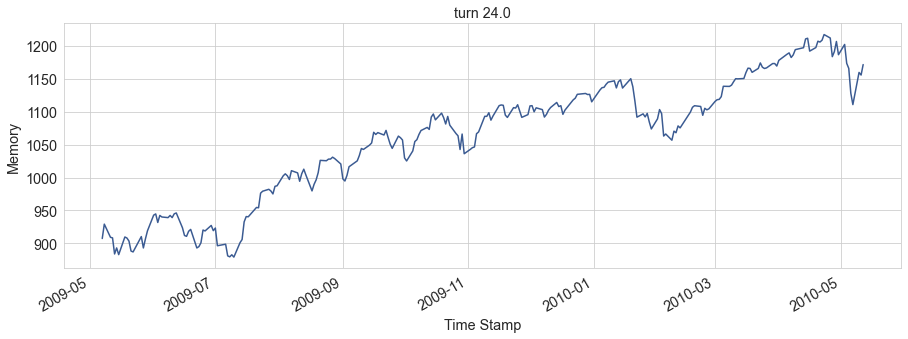

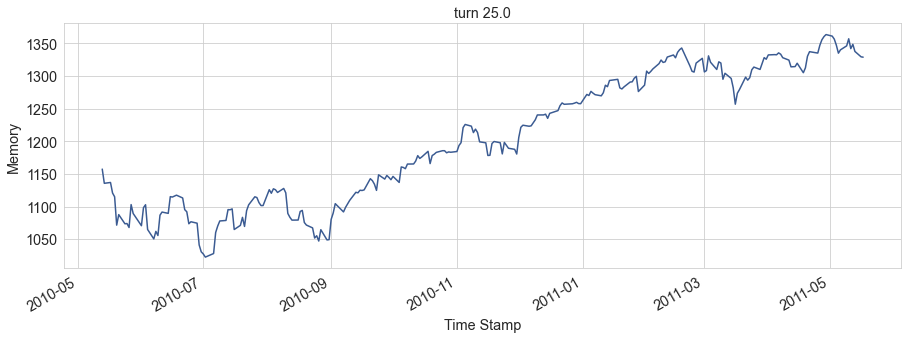

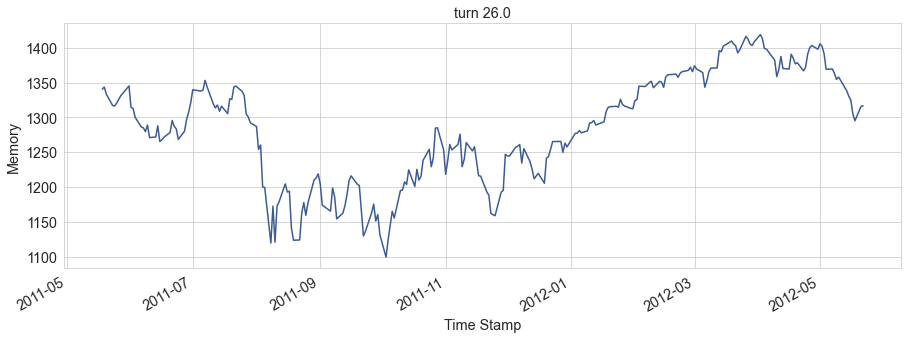

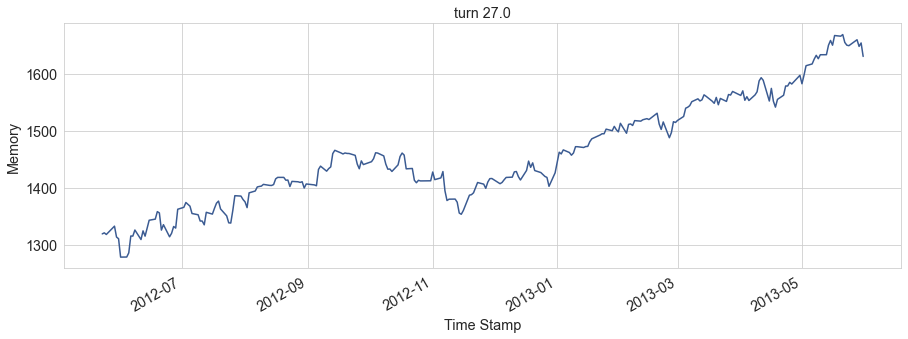

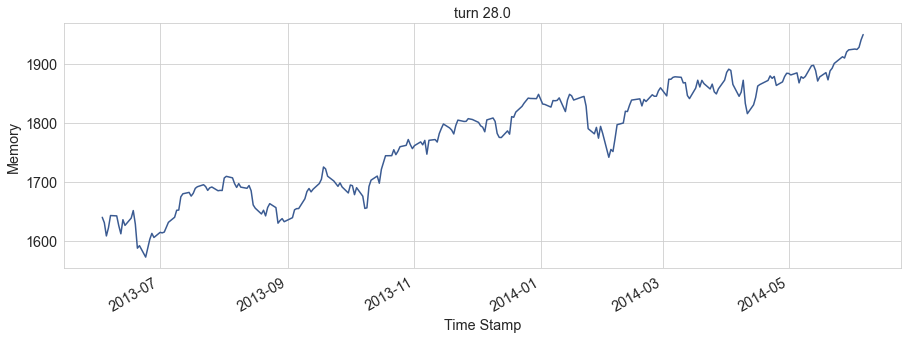

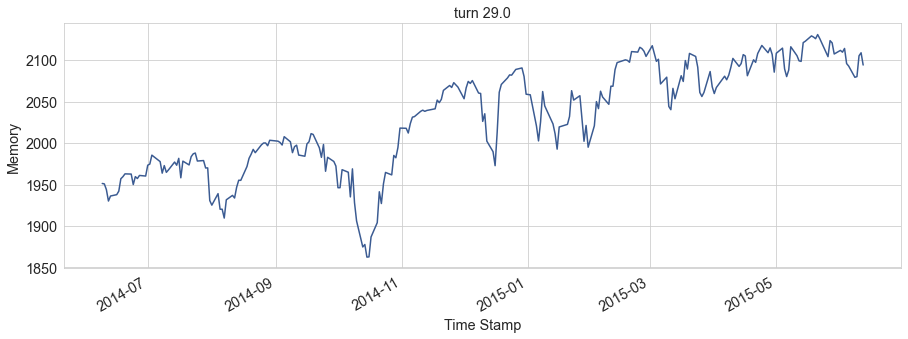

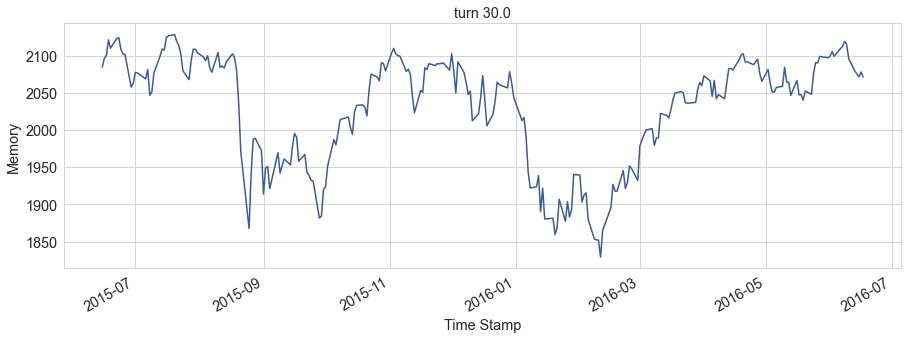

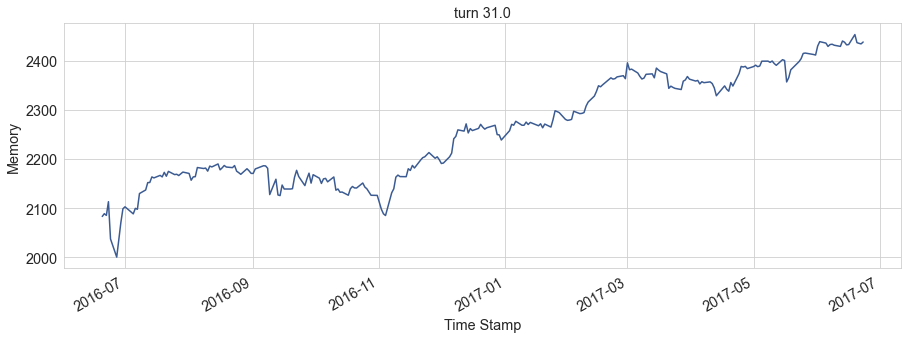

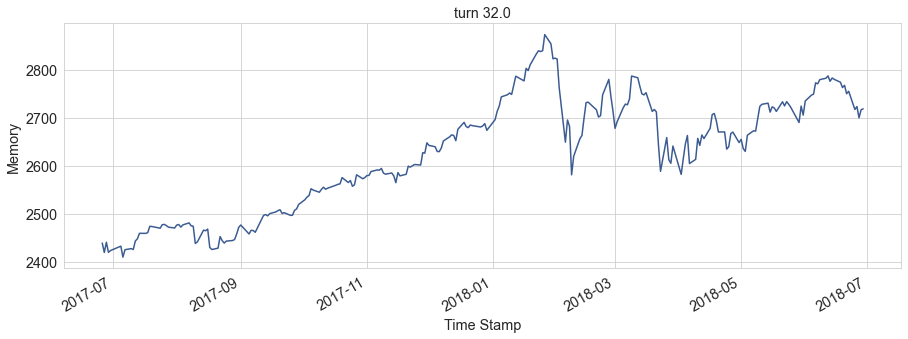

In [18]:
step = 256

for i in range(0,df.shape[0],step):
    fig = plt.figure(figsize=(15,5))
    tmp = df[i:i+step]['close'].plot(color=sns.xkcd_rgb["denim blue"])
    plt.title("turn %s"%(i/step +1))
    plt.xlabel('Time Stamp')
    plt.ylabel('Memory')
    plt.show()
    pp = PdfPages("turn_%s.pdf"%(i/step +1))
    pp.savefig(fig)
    pp.close()

In [19]:
anomaly_weeks = [30]
validation1_weeks = [4,5,6,7]
validation2_weeks = [29,30,31,32]
test_weeks = validation2_weeks

df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []

for i in range(0,df.shape[0],step):
    week = i/step +1
    if week in validation1_weeks:
        df_valid1_list.append(df[i:i+step]) 

    if week in validation2_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])

    if week in test_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])

    if week not in validation1_weeks and week not in validation2_weeks:
        df_train_list.append(df[i:i+step])

print(len(df_train_list))
print(len(df_valid1_list))
print(len(df_valid2_list))
print(len(df_test_list))

24
4
4
4
<ipython-input-19-c9242ca94fbe>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i:i+step]['anomaly'] =1
<ipython-input-19-c9242ca94fbe>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i:i+step]['anomaly'] =1


In [20]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

Size of train: (6144, 2)
Size of test: (1024, 2)
Size of validation1: (1024, 2)
Size of validation2: (1024, 2)
Total: 9216
Ratio of train: 0.666667
Ratio of test: 0.111111
Ratio of validation1: 0.111111
Ratio of validation2: 0.111111


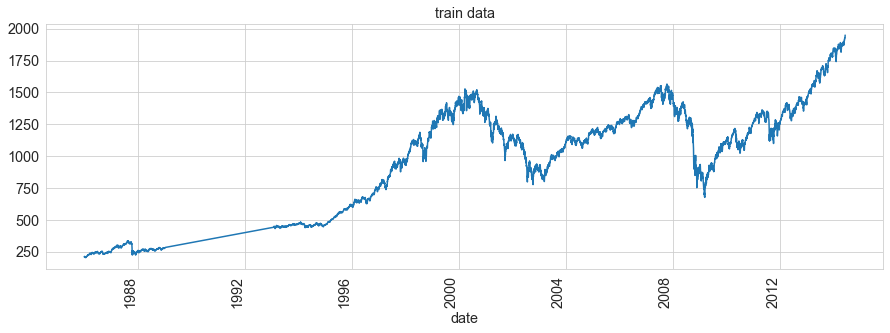

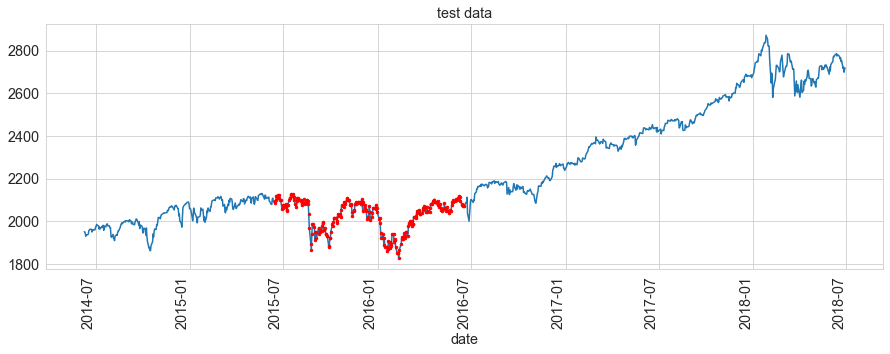

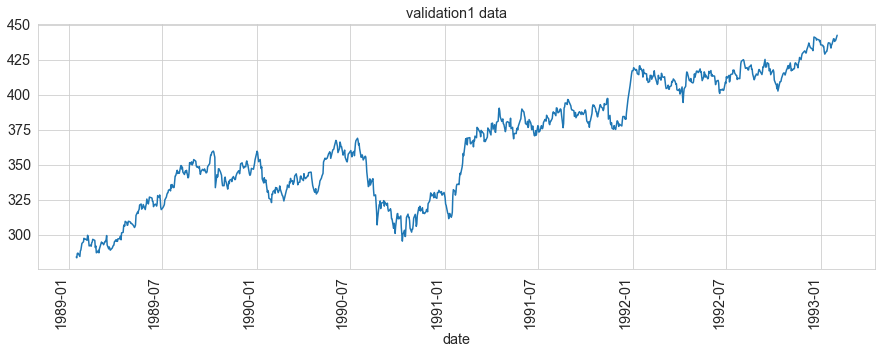

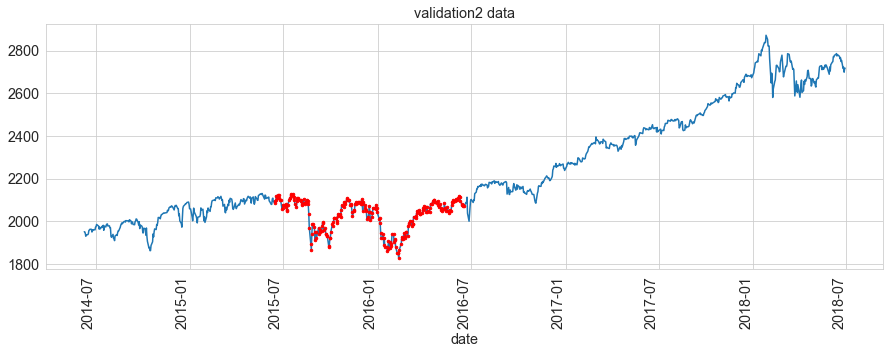

In [21]:
count = 0
for key in df_dict:
    print("Size of %s: %s"%(key,df_dict[key].shape))
    count += df_dict[key].shape[0]
print("Total: %d"%(count))

for key in df_dict:
    print("Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count))

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    df_tmp['close'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [22]:
for key in df_dict:
    np.save("../resources/data/discords/stock/%s"%(key),df_dict[key])

### Part 2: Prediction Modeling
Use python scripts: *lstm_predictor.py , stateful_lstm_predictor.py*.

### Part 3: Anomaly Detection